# Assignment Customer Satisfaction and Sentiment Analysis


## Objective

You are a data analyst of a consulting company that provides customer insight regarding multiple ticketing system, such as JIRA and Zoho Desk. Your team gather surveys to customers regarding their ticketing system's performance. Your role in the team is to gather reports regarding customer satisfaction and sentiment analysis into a single dashboard and present your insight.

Analyze the following metrics and other insight you can find in the dataset:

- Survey response rate
- Customer Satisfaction score (CSAT)
- Customer Effort Score (CES)
- Net Promoter Score (NPS)
- Sentiment Analysis



## Data Preparation

In [33]:
import numpy as np
import pandas as pd
import os

pd.options.display.max_columns = 999
pd.options.display.float_format = "{:.2f}".format

### Read Data

Read the file **assignment_ticket_system_review.csv**

In [34]:
df = pd.read_csv('../data/assignment_ticket_system_review.csv', delimiter=",", engine="python")
df.head()

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text
0,T_02161,2024-11-20,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif..."
3,T_03190,2024-12-08,Zoho Desk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...


The following is the dictionary for the data, survey is only valid if all of the survey questions and text review is not blank (null):

**General Information**
- id_survey: identifier for each survey
- date_of_survey: date of survey taken
- ticket_system: The name of the ticket system being reviewed (e.g. Zoho Desk)

**Survey Questions**
- overall_rating: The overall satisfaction rating given by the reviewer, ranging from 1 to 5
- customer_service: The satisfaction rating for the customer service provided by the ticket system, ranging from 1 to 5.
- features: The satisfaction rating for the features of the ticket system, ranging from 1 to 5
- value_for_money: The satisfaction rating for the value for money provided by the ticket system, ranging from 1 to 5
- ease_of_use: The rating for how easy the ticket system is to use, ranging from 1 to 5
- likelihood_to_recommend: The likelihood that the reviewer would recommend the ticket system to others, ranging from 1 to 10
- overall_text: The full text of the overall review, providing detailed feedback on the ticket system.


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_survey                1462 non-null   object 
 1   date_of_survey           1462 non-null   object 
 2   ticket_system            1462 non-null   object 
 3   overall_rating           787 non-null    float64
 4   customer_service         787 non-null    float64
 5   features                 787 non-null    float64
 6   value_for_money          787 non-null    float64
 7   ease_of_use              787 non-null    float64
 8   likelihood_to_recommend  787 non-null    float64
 9   overall_text             787 non-null    object 
dtypes: float64(6), object(4)
memory usage: 114.3+ KB


### Data Cleansing

Convert the date column into proper date_time format.

In [36]:
df['date_of_survey'] = pd.to_datetime(df['date_of_survey'])
df['date_of_survey'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1462 entries, 0 to 1461
Series name: date_of_survey
Non-Null Count  Dtype         
--------------  -----         
1462 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.6 KB


In [37]:
# Check the timeframe for conducting the survey.
print(f"Survey timeframe: {df['date_of_survey'].min()} until {df['date_of_survey'].max()}")

Survey timeframe: 2024-10-01 00:00:00 until 2024-12-30 00:00:00


The survey was conducted for approximately 3 months, starting from October 1st to December 30th, 2024.

In [38]:
df.isna().sum()

id_survey                    0
date_of_survey               0
ticket_system                0
overall_rating             675
customer_service           675
features                   675
value_for_money            675
ease_of_use                675
likelihood_to_recommend    675
overall_text               675
dtype: int64

Many rating columns are not filled.

In [39]:
# taking the rows that are completely filled
df_valid = df[
    df['overall_rating'].notna() &
    df['customer_service'].notna() &
    df['features'].notna() &
    df['value_for_money'].notna() &
    df['ease_of_use'].notna() &
    df['likelihood_to_recommend'].notna()
].copy()
display(df_valid.shape)
display(df_valid.isna().sum())

(787, 10)

id_survey                  0
date_of_survey             0
ticket_system              0
overall_rating             0
customer_service           0
features                   0
value_for_money            0
ease_of_use                0
likelihood_to_recommend    0
overall_text               0
dtype: int64

In [40]:
# Check for data anomalies.
df_anomaly = df[
    (df['overall_rating'].notna() & ~df['overall_rating'].between(1,5)) |
    (df['customer_service'].notna() & ~df['customer_service'].between(1,5)) |
    (df['features'].notna() & ~df['features'].between(1,5)) |
    (df['value_for_money'].notna() & ~df['value_for_money'].between(1,5)) |
    (df['ease_of_use'].notna() & ~df['ease_of_use'].between(1,5)) |
    (df['likelihood_to_recommend'].notna() & ~df['likelihood_to_recommend'].between(1,10))
]

display(len(df_anomaly))
display(df_anomaly.head())

18

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text
183,T_04025,2024-12-19,Zoho Desk,3.00,-1.00,3.00,3.00,5.00,5.00,There is def. a lot we could use. We are still...
203,T_02922,2024-12-04,Zendesk,1.00,0.00,2.00,1.00,1.00,1.00,"I would never, under any circumstances, ever s..."
245,T_04207,2024-12-21,Zendesk,3.00,0.00,2.00,2.00,3.00,4.00,I would not recommend Zendesk unless you work ...
253,T_03598,2024-12-13,Zoho Desk,4.00,0.00,3.00,3.00,4.00,7.00,Work reviews and performance monitoring easily...
258,T_02665,2024-12-01,Zoho Desk,4.00,0.00,4.00,4.00,4.00,7.00,Pros:It has alot of features to offer. Telepho...


There are 18 respondents with values that are anomalous or outside the rating range.

In [41]:
# Filter valid rows according to the range of each column.
df_valid = df_valid[
    (df_valid['overall_rating'].between(1, 5)) & # 1-5
    (df_valid['customer_service'].between(1, 5)) & # 1-5
    (df_valid['features'].between(1, 5)) & # 1-5
    (df_valid['value_for_money'].between(1, 5)) & # 1-5
    (df_valid['ease_of_use'].between(1, 5)) & # 1-5
    (df_valid['likelihood_to_recommend'].between(1, 10)) # 1-10
].copy()
display(df_valid.shape)
display(df_valid.head())

(769, 10)

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif..."
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...
6,T_04682,2024-12-28,Zoho Desk,5.00,4.00,5.00,5.00,5.00,8.00,It has been very useful so far to integrate mu...
8,T_01238,2024-11-02,Freshdesk,4.00,4.00,4.00,5.00,4.00,8.00,Pros:It's easy to use and very intuitive.We ha...


In [42]:
df_valid.describe()

,date_of_survey,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend
count,769,769.00,769.00,769.00,769.00,769.00,769.00
mean,2024-11-22 01:46:44.161248512,4.59,3.45,4.45,4.42,4.50,7.71
min,2024-10-01 00:00:00,3.00,1.00,2.00,1.00,2.00,2.00
25%,2024-11-02 00:00:00,4.00,3.00,4.00,4.00,4.00,7.00
50%,2024-11-27 00:00:00,5.00,4.00,5.00,5.00,5.00,8.00
75%,2024-12-13 00:00:00,5.00,4.00,5.00,5.00,5.00,9.00
max,2024-12-30 00:00:00,5.00,5.00,5.00,5.00,5.00,10.00
std,NaN,0.57,1.02,0.67,0.76,0.69,1.55


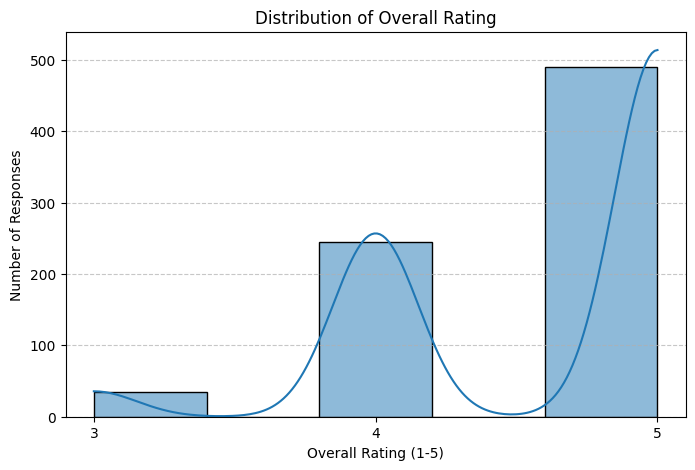

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df_valid['overall_rating'], bins=5, kde=True)
plt.title('Distribution of Overall Rating')
plt.xlabel('Overall Rating (1-5)')
plt.ylabel('Number of Responses')
plt.xticks(sorted(df_valid['overall_rating'].unique()))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\majel\AppData\Local\Temp\ipykernel_35000\1633262717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ticket_system', data=df_valid, palette='viridis')


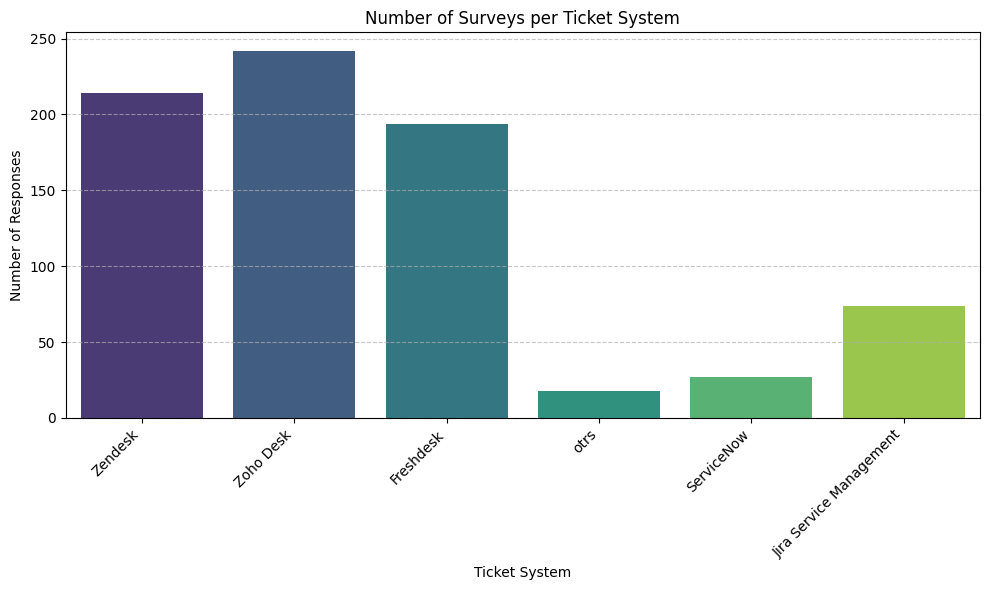

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ticket_system', data=df_valid, palette='viridis')
plt.title('Number of Surveys per Ticket System')
plt.xlabel('Ticket System')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Survey Analysis

### Response Rate

Start by analyzing how many customers has filled the survey, indicated by whether the overall_rating is not blank.

In [45]:
# How many customer responded to the survey?

respone_rate = (len(df_valid) / len(df))* 100

print(f"Presentase responden yang mengisi survey valid : {respone_rate:.2f}%")

Presentase responden yang mengisi survey valid : 52.60%


Out of all the surveys received from respondents, only 52.60% were valid.

Create a new dataframe that consists only of those who have responded the survey to simplify calculating the CSAT, CES, and NPS Score.

In [46]:
# Responded Customer
df_rating = df_valid.copy()

### CSAT Score

Measure the customer's overall satisfaction score (CSAT) with the following formula:

$$
CSAT = \frac{\Sigma\ total\ satisfaction\ score}{number\ of\ responded\ customer \times \max\ rating}
$$

The max rating is inserted to convert the CSAT score into percentage.

CSAT score can be classified into categories based on the result. There is no absolute threshold for each categories but the following is the common threshold:

- \>= 90%: Excellent
- 75%-90%: Good
- 60-75%: Fair
- \<60%: Poor

In [47]:
# CSAT Score
# Calculating the total satisfaction overall rating
total_rating_satisfaction = df_rating['overall_rating'].sum()

# total respondents
total_respondent = len(df_rating)

max_rating = 5

# calculating CSAT
csat_score = (total_rating_satisfaction / (total_respondent * max_rating)) * 100

# determining the CSAT category
if csat_score >= 90:
  category = 'Excellent'
elif csat_score >= 75:
  category = 'Good'
elif csat_score >= 60:
  category = 'Fair'
else:
  category = 'Poor'

print(f"CSAT Score: {csat_score:.2f}% - {category}")

CSAT Score: 91.86% - Excellent


Measure the satisfaction score for the following attributes:

- customer service
- features
- value for money

In [48]:
# Satisfaction Score for Attributes
max_rating = 5
respondent = len(df_rating)

# Customer Service CSAT
csat_customer_service = (df_rating['customer_service'].sum() / (respondent * max_rating)) * 100

# Features CSAT
csat_features = (df_rating['features'].sum() / (respondent * max_rating)) * 100

# Value for Money CSAT
csat_value_for_money = (df_rating['value_for_money'].sum() / (respondent * max_rating)) * 100

def classify(score):
    if score >= 90:
        return "Excellent"
    elif score >= 75:
        return "Good"
    elif score >= 60:
        return "Fair"
    else:
        return "Poor"

print(f"Customer Service: {csat_customer_service:.2f}% - {classify(csat_customer_service)}")
print(f"Features: {csat_features:.2f}% - {classify(csat_features)}")
print(f"Value for Money: {csat_value_for_money:.2f}% - {classify(csat_value_for_money)}")

Customer Service: 68.92% - Fair
Features: 89.00% - Good
Value for Money: 88.43% - Good


### CES Score

Measure CES with the following formula


$$
CES = \frac{\Sigma\ total\ effort\ score}{number\ of\ responded\ customer \times \max\ rating}
$$

In [49]:
# CES Score
max_rating = 5
respondent = len(df_rating)

ces_score = (df_rating['ease_of_use'].sum() / (respondent * max_rating)) * 100

print(f"CES Score: {ces_score:.2f}%")

CES Score: 90.07%


### NPS Score

To calculate the NPS score, first we must convert the **would_you_recommend** column into proper NPS Category based on the rating value:

* Promoter: Rating 9-10
* Passive: Rating 7-8
* Detractor: Rating < 7

In [50]:
# Category NPS
def nps_category(score):
    if score >= 9:
        return "Promoter"
    if score >= 7:
        return "Passive"
    else:
        return "Detractor"

df_rating['nps_category'] = df_rating['likelihood_to_recommend'].apply(nps_category)
df_rating[['likelihood_to_recommend', 'nps_category']].head()

,likelihood_to_recommend,nps_category
1,6.00,Detractor
2,8.00,Passive
4,6.00,Detractor
6,8.00,Passive
8,8.00,Passive



Calculate the NPS Score with the following formula

$$
NPS = \frac{Promoter - Detractor}{Total\ Survey\ Responded}
$$

In [51]:
# NPS Score
# menghitung jumlah promoter dan detractor
promoter = len(df_rating[df_rating['nps_category'] == 'Promoter'])
detractor = len(df_rating[df_rating['nps_category'] == 'Detractor'])
respondent = len(df_rating)

# calculated
nps_score = (promoter - detractor) / respondent

# persentase
nps_score_percentage = (nps_score * 100)

# classification
def classify_nps(nps):
    if nps >= 70:
        return "Excellent"
    elif nps >= 50:
        return "Very Good"
    elif nps >= 30:
        return "Good"
    elif nps >= 0:
        return "Average"
    else:
        return "Poor"

print(f"NPS Score: {nps_score_percentage:.2f}% - {classify_nps(nps_score_percentage)}")

NPS Score: 14.04% - Average


NPS score can be ranging from -100 (when all customers are detractor) to 100 (when all customers are promoter).

NPS Score can be classified into categories based on the following threshold:

- \>= 70: Excellent
- 50-69: Very Good
- 30-49: Good
- 0-29: Average
- \< 0: Poor

## Sentiment Analysis

Create a new dataframe with no blank overall_text.

In [52]:
# Create new dataframe
# mengambil dari data yang sudah valid secara overall rating
df_sentiment = df_valid[df_valid['overall_text'].notna()].copy() # teks yang tidak kosong

display(df_sentiment.shape)
display(df_sentiment.head())

(769, 10)

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif..."
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...
6,T_04682,2024-12-28,Zoho Desk,5.00,4.00,5.00,5.00,5.00,8.00,It has been very useful so far to integrate mu...
8,T_01238,2024-11-02,Freshdesk,4.00,4.00,4.00,5.00,4.00,8.00,Pros:It's easy to use and very intuitive.We ha...


### Text Cleansing

In order to get more accurate sentiment, several text cleansing need to be done. However, in most of recent sentiment analysis models and algorithm, the only text cleansing needed are as follows:

* Clean double whitespace
* Clean URL/website
* Clean username (mostly in social media or digital text)

In [53]:
import re

def cleansing_text(x):
  # clean double whitespace
  out_text = ' '.join(x.split())

  # clean url
  out_text = re.sub(r"http\S+|www\S+|https\S+", 'http', out_text)

  # clean username
  out_text = re.sub(r"@\S+", '@user', out_text)

  return(out_text)

cleansing_text(" Doesn't  dissapoint. The car       was great. It was the best car rental experiences I've had! Salute to @jone who recommend https:/rental.com")

"Doesn't dissapoint. The car was great. It was the best car rental experiences I've had! Salute to @user who recommend http"

In [54]:
# apply cleansing to review
df_sentiment['overall_text'] = df_sentiment['overall_text'].apply(cleansing_text)
df_sentiment[['overall_text']].values

array([['Customer tickets managements'],
       ['After 6 months of using the Zoho desk, we shifted to different software, but my experience using Zoho was great! Indeed, I would still recommend using Zoho after all.'],
       ["Pros:Zendesk has always been one of the go-to solutions for helpdesk software, but they've really streamlined their system over the last few years. It's simple and easy to use with straightforward options for even those who are new to using a helpdesk system.Zendesk is basically an email support system, where all emails sent will be routed to your Zendesk dashboard and show up as support tickets. Tickets are tagged with its own ID and even cross-referenced to see if a particular sender has submitted any tickets prior, so it's easy to check through the support history. There are also pre-defined responses, allowing for quick and easy replies for typical queries.Of course, these are actually what you might believe every helpdesk system should provide, but you'll 

### Sentiment Analysis

Create a sentiment categories using algorithm of your own choice.

In [55]:
!pip install vaderSentiment --quiet


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
# Sentiment Algorithm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_category(text):
    if not isinstance(text, str) or text.strip() == "":
        return None
    scores = analyzer.polarity_scores(text)
    compound = scores['compound']

    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'
df_sentiment['sentiment'] = df_sentiment['overall_text'].apply(vader_sentiment_category)
df_sentiment[['overall_text', 'sentiment']].head()

,overall_text,sentiment
1,Customer tickets managements,neutral
2,"After 6 months of using the Zoho desk, we shif...",positive
4,Pros:Zendesk has always been one of the go-to ...,positive
6,It has been very useful so far to integrate mu...,positive
8,Pros:It's easy to use and very intuitive.We ha...,positive


Check the number of data by sentiment.

In [57]:
# Number of Sentiment
sentiment_percentage = df_sentiment['sentiment'].value_counts(normalize=True) * 100
sentiment_percentage.round(2)

pd.DataFrame({
    "count": df_sentiment['sentiment'].value_counts(),
    "percentage (%)": sentiment_percentage.round(2)
})


,count,percentage (%)
sentiment,,
positive,661,85.96
neutral,83,10.79
negative,25,3.25


The sentiment provided resulted in a very satisfactory value of 85% positive sentiment, 10% neutral, and 3% negative.

## Finalize Data for Reporting

Save the review data with NPS category and sentiment information to new csv for the dashboard.

In [58]:
# Save Data
df_rating.to_excel('df_rating.xlsx', index=False)
df_sentiment.to_excel('df_sentiment.xlsx', index=False)